<a href="https://colab.research.google.com/github/aparna993/Customer-Cohort-Analysis/blob/master/cohort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

In [34]:
df = pd.read_excel('/content/online_retail_II.xlsx',
                   dtype={'CustomerID': str,
                          'InvoiceID': str},
                   parse_dates=['InvoiceDate'], 
                   infer_datetime_format=True)

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [36]:
df.dropna(subset=['Customer ID'], inplace=True)

In [37]:
df[["Quantity","Price"]].describe()

,Quantity,Price
count,417534.000000,417534.000000
mean,12.758815,3.887547
std,101.220424,71.131797
min,-9360.000000,0.000000
25%,2.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,19152.000000,25111.090000


In [38]:
(df['Quantity'] < 0).sum()

9839

In [56]:
df_new = (df[df['Quantity']<0])
df = df.drop(df_new.index)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [66]:
unique_orders_perc = df.groupby(["Customer ID"])["Invoice"].nunique()

In [74]:
multi_orders_perc = np.sum(unique_orders_perc>1)/df['Customer ID'].nunique()

In [75]:
print(f'{100* multi_orders_perc:.2f}% of customers ordered more than once')

67.06% of customers ordered more than once


[Text(0, 0.5, 'Number of customers'),
 Text(0.5, 0, 'Number of orders'),
 Text(0.5, 1.0, 'Distribution of number of orders per customer')]

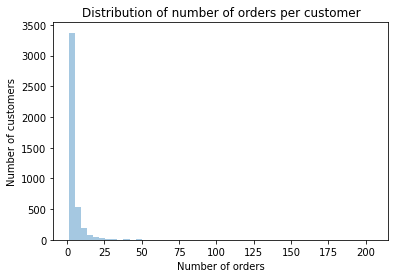

In [77]:
ax = sns.distplot(unique_orders_perc,kde = False,hist = True)
ax.set(title = 'Distribution of number of orders per customer',
       xlabel= 'Number of orders',
       ylabel = 'Number of customers')

In [1]:
df_cohort = df[['Customer ID','InvoiceNo','InvoiceDate']].drop_duplicates()

NameError: ignored